# Analysis of Oil and Gas companies
1 - Extract latest stocks from pandas web-data reader and Yahoo finance

2 - View the data through exploratory analysis such as correlation heatmap, matplotlib
visualization, and prediction analysis using linear analysis and K nearest Neighbor (KNN)


Loading YahooFinance Dataset
Devon Energy,

In [1]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

start = datetime.datetime(2010, 1, 1)
end   = datetime.datetime(2020, 6, 19)

#df = web.DataReader("AAPL", 'yahoo', start, end)   # AAPL apple stock price
df = web.DataReader(['DVN', 'APA', 'EOG', 'COP', 'MRO'],'yahoo',start=start,end=end)['Adj Close']
#for multiple company analyses

Rolling Mean (Moving Average) — to determine trend

In [2]:
mavg = df.rolling(window=10).mean() # last 100 windows = days

matplotlib setting

In [3]:
import matplotlib.pyplot as plt
from matplotlib import style

adjusting the size of matplotlib adjusting the style of matplotlib and ploting close_px and mavg

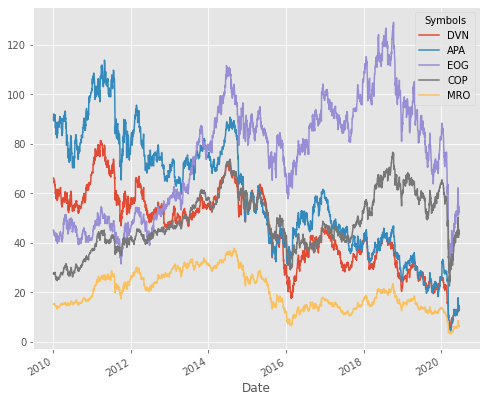

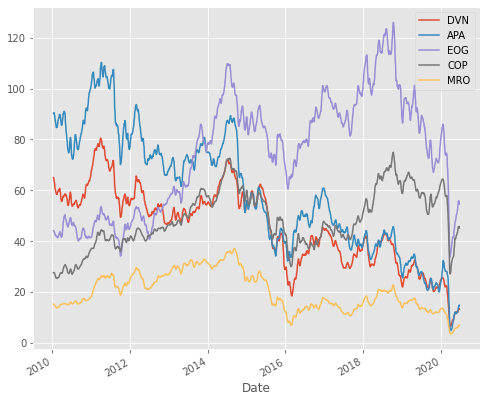

In [4]:
import matplotlib as mpl
mpl.rc('figure', figsize=(8,7))
mpl.__version__

style.use('ggplot')
df.plot()
mavg.plot()
plt.legend()

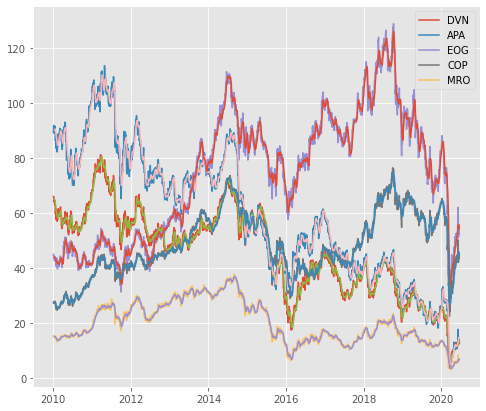

In [5]:
plt.plot(df)
plt.plot(mavg)
plt.legend(df)

Return Deviation — to determine risk and return

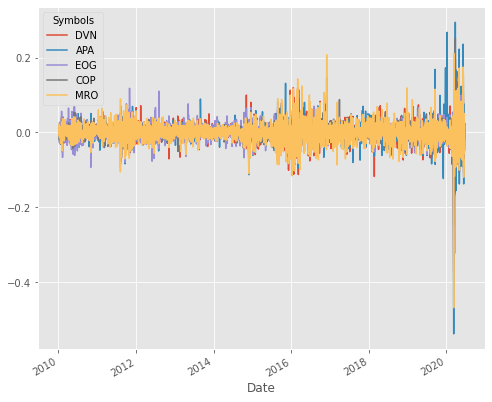

In [6]:
rets = df / df.shift(1) - 1
rets.plot(label='return')

Analysing your Competitors Stocks - loading DVN, APA, EOG, COP, MRO adj close data

In [7]:
dfcomp = web.DataReader(['DVN', 'APA', 'EOG', 'COP', 'MRO'],'yahoo',start=start,end=end)['Adj Close']

Correlation Analysis — Does one competitor affect others?
 - pct_change() = Percentage change (returns) between the current and a prior element.

In [8]:
retscomp = dfcomp.pct_change()
corr = retscomp.corr()

Let’s plot Devon and MRO with ScatterPlot to view their return distributions.

Text(0.5, 1.0, 'Returns vs Returns')

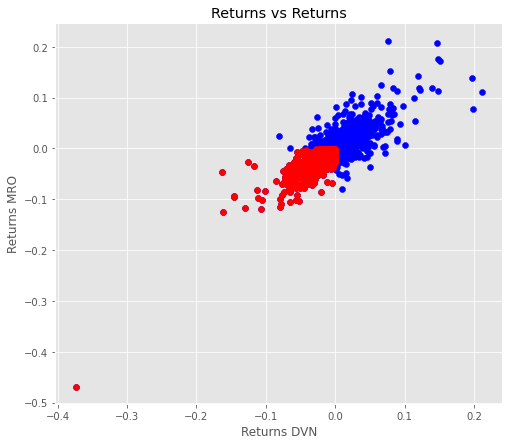

In [9]:
#prev = retscomp.DVN.where(retscomp.DVN.where(retscomp.MRO < 0) < 0)
#plt.scatter(retscomp.DVN, retscomp.MRO, c = 'red')


plt.scatter(retscomp.DVN.dropna(), retscomp.MRO.dropna(), c = 'blue') #works without different color
plt.scatter(retscomp.DVN.dropna().where(retscomp.DVN < 0), retscomp.MRO.dropna().where(retscomp.MRO < 0), c = 'red') #works without different color
plt.xlabel('Returns DVN')
plt.ylabel('Returns MRO')
plt.title('Returns vs Returns')

In [10]:
import plotly.express as px
import datetime
import pandas as pd
import pandas_datareader.data as web

start = datetime.datetime(2020, 1, 1)
end   = datetime.datetime(2020, 6, 19)

dfcomp = web.DataReader(['DVN', 'APA', 'EOG', 'COP', 'MRO'],'yahoo',start=start,end=end)['Adj Close']
retscomp = dfcomp.pct_change()

x = retscomp.DVN.dropna()
y = retscomp.MRO.dropna()
fig = px.scatter(x = x, y = y, color = x.index)
fig.update_layout(showlegend=False)
fig.show()


In [11]:
import plotly.express as px
#df = px.data.iris()
fig = px.scatter_matrix(retscomp.dropna(), dimensions=['DVN', 'APA', 'EOG', 'COP', 'MRO'], color = retscomp.dropna().index)
fig.update_layout(showlegend=False)
fig.show()

Text(0, 0.5, 'Returns MRO')

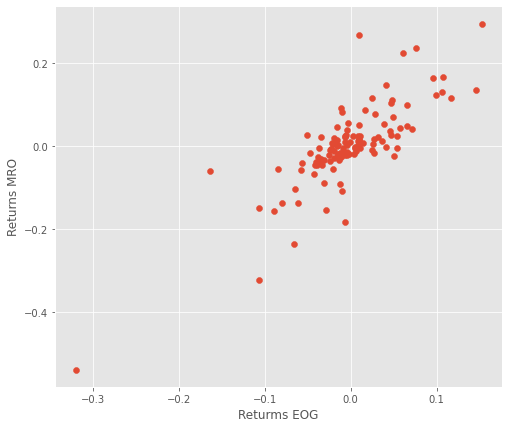

In [12]:
plt.scatter(retscomp.EOG, retscomp.APA)
plt.xlabel('Returms EOG')
plt.ylabel('Returns MRO')

Text(0, 0.5, 'Returns MRO')

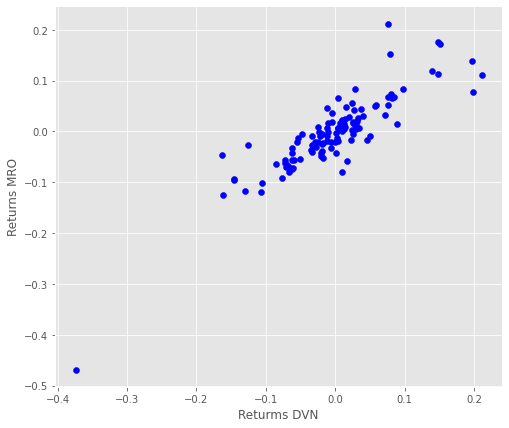

In [18]:
plt.scatter(retscomp.DVN, retscomp.MRO, c = 'blue') #works without different color
plt.xlabel('Returms DVN')
plt.ylabel('Returns MRO')

Kernel Density Estimation

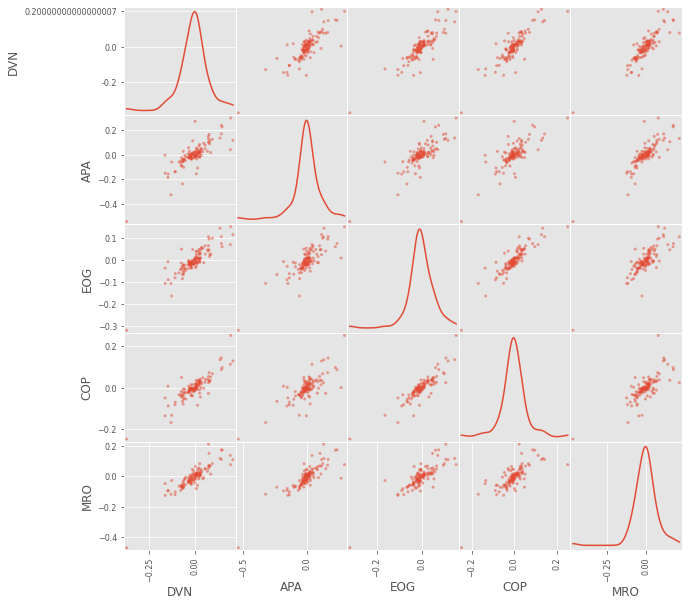

In [14]:
pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(10, 10));

correlation matrix

([<matplotlib.axis.YTick at 0x7f8bb9919310>,
 [Text(0, 0, 'DVN'),
  Text(0, 0, 'APA'),
  Text(0, 0, 'EOG'),
  Text(0, 0, 'COP'),
  Text(0, 0, 'MRO')])

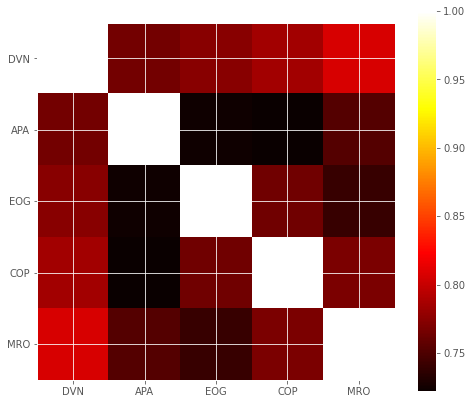

In [15]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns)

Stock Returns Rate and Risk
the average of returns (Return Rate) and
the standard deviation of returns (Risk) are calculated

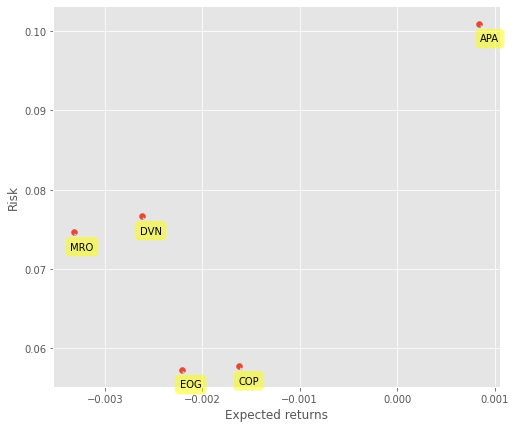

In [16]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label,
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',          #text added
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5), #yellow box around the tex
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))#arrows showing the box
